In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
%matplotlib inline

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16541198341582045180
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3155650150
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15100130137157124053
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
incidents = pd.read_csv("Data/police-department-incidents.csv")
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,...,:@computed_region_n4xg_c4py,:@computed_region_4isq_27mq,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6pnf_4xz7,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15T00:00:00.000,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,...,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,2018-05-15T00:00:00.000,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.419258,...,1.0,NaN,1.0,NaN,8.0,2.0,1.0,1.0,1.0,NaN
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,2018-05-15T00:00:00.000,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,...,NaN,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,2018-05-15T00:00:00.000,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,...,NaN,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,2018-05-15T00:00:00.000,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,...,NaN,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN


The data contains no meaning colums at the end. So we will remove all of them:

In [3]:
incidents = incidents.loc[:, ~incidents.columns.str.contains('^:@')]
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15T00:00:00.000,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,37.775207,"{'longitude': '-122.41191202732877', 'latitude...",18036228907023,32.0,1.0,10.0,34.0
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,2018-05-15T00:00:00.000,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.419258,37.775146,"{'longitude': '-122.41925789481357', 'latitude...",18036094864020,32.0,1.0,10.0,20.0
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,2018-05-15T00:00:00.000,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'longitude': '-122.41781255878655', 'latitude...",18036087926150,53.0,3.0,2.0,20.0
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,2018-05-15T00:00:00.000,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'longitude': '-122.41781255878655', 'latitude...",18036087965010,53.0,3.0,2.0,20.0
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,2018-05-15T00:00:00.000,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'longitude': '-122.41781255878655', 'latitude...",18036087965015,53.0,3.0,2.0,20.0


In [4]:
incidents.Date= pd.to_datetime(incidents.Date)

In [5]:
incidents["Day"] = incidents.Date.dt.day
incidents["Month"] = incidents.Date.dt.month

In [6]:
incidents = incidents.drop(["Date"], axis=1)

From Date, we generate two features which are Day and Month. Then we take a look at the correlation of other features vs our ouput:

In [7]:
from sklearn.preprocessing import LabelEncoder
temp = LabelEncoder().fit_transform(y=incidents["Category"])
pd.DataFrame({"Categories": temp}).join(incidents).corr()["Categories"]

Categories                      1.000000
IncidntNum                     -0.015336
X                              -0.020790
Y                              -0.001543
PdId                           -0.015336
SF Find Neighborhoods           0.034254
Current Police Districts        0.019954
Current Supervisor Districts   -0.028002
Analysis Neighborhoods         -0.024748
Day                             0.000501
Month                           0.001332
Name: Categories, dtype: float64

In [8]:
incidents = incidents.drop(["IncidntNum", "Descript", "Address", "Resolution",
                             "Location", "Current Supervisor Districts",
                             "PdId", "Current Police Districts",
                             "Analysis Neighborhoods", "SF Find Neighborhoods"],
                           axis=1)

Here we drop the features that we cannot make sense of or we think are not relevant to the prediction. And since the correlation of then are so low, they are not important features.

In [9]:
incidents.head(10)

,Category,DayOfWeek,Time,PdDistrict,X,Y,Day,Month
0,VEHICLE THEFT,Tuesday,10:30,SOUTHERN,-122.411912,37.775207,15,5
1,NON-CRIMINAL,Tuesday,04:14,SOUTHERN,-122.419258,37.775146,15,5
2,OTHER OFFENSES,Tuesday,02:01,MISSION,-122.417813,37.757101,15,5
3,OTHER OFFENSES,Tuesday,02:01,MISSION,-122.417813,37.757101,15,5
4,OTHER OFFENSES,Tuesday,02:01,MISSION,-122.417813,37.757101,15,5
5,OTHER OFFENSES,Tuesday,01:27,MISSION,-122.415617,37.756414,15,5
6,ROBBERY,Tuesday,01:25,SOUTHERN,-122.410042,37.781954,15,5
7,DRUG/NARCOTIC,Tuesday,01:25,SOUTHERN,-122.410042,37.781954,15,5
8,LIQUOR LAWS,Tuesday,00:19,PARK,-122.447761,37.769846,15,5
9,WARRANTS,Tuesday,00:19,PARK,-122.447761,37.769846,15,5


In [10]:
district_count = pd.DataFrame(incidents.groupby([ 'Category']).count()).reset_index() 
district_count.head(n=10)

,Category,DayOfWeek,Time,PdDistrict,X,Y,Day,Month
0,ARSON,3931,3931,3931,3931,3931,3931,3931
1,ASSAULT,194694,194694,194694,194694,194694,194694,194694
2,BAD CHECKS,925,925,925,925,925,925,925
3,BRIBERY,813,813,813,813,813,813,813
4,BURGLARY,91543,91543,91543,91543,91543,91543,91543
5,DISORDERLY CONDUCT,10040,10040,10040,10040,10040,10040,10040
6,DRIVING UNDER THE INFLUENCE,5672,5672,5672,5672,5672,5672,5672
7,DRUG/NARCOTIC,119628,119628,119628,119628,119628,119628,119628
8,DRUNKENNESS,9826,9826,9826,9826,9826,9826,9826
9,EMBEZZLEMENT,2988,2988,2988,2988,2988,2988,2988


C:\Users\nthan\.conda\envs\Crime_Prediction_SF\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


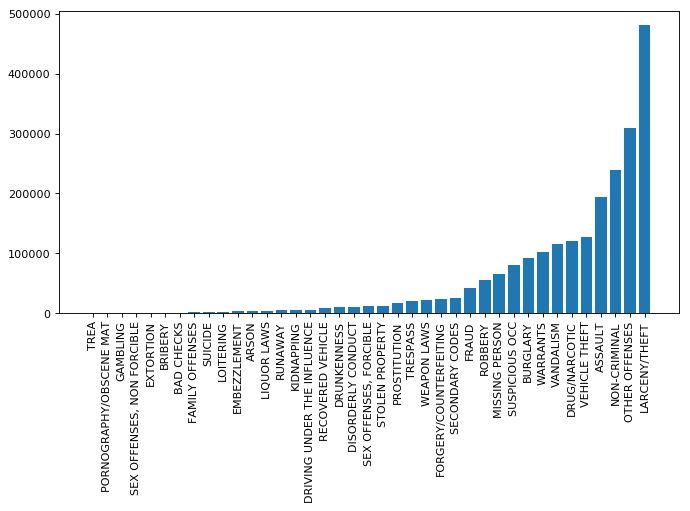

In [11]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
district_count = district_count.sort_values("DayOfWeek")
plt.bar(district_count["Category"], district_count["DayOfWeek"])
plt.xticks(rotation = 90, )
fig.show()

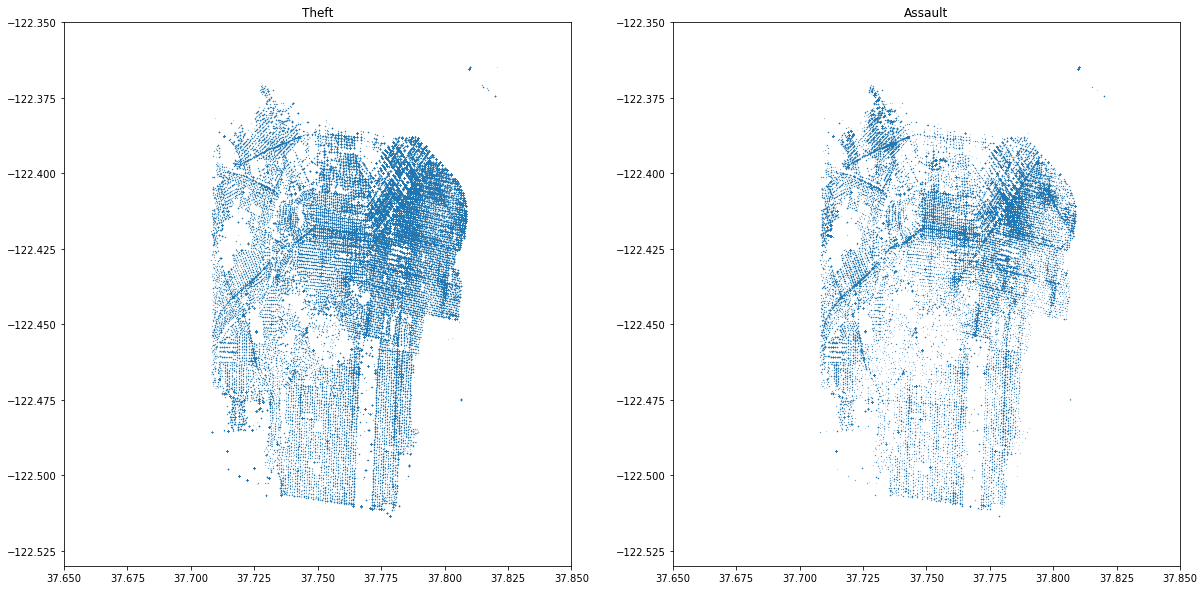

In [12]:
thefts = incidents[incidents['Category'] == 'LARCENY/THEFT']
assault = incidents[incidents['Category'] == 'ASSAULT']
thefts.head()
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(20,10))
ax1.set_xlim(37.65, 37.85)
ax1.set_ylim(-122.53,-122.35)
ax1.set_title('Theft')
ax1.scatter(thefts['Y'],thefts['X'], s=0.01, alpha=1)

ax2.set_xlim(37.65, 37.85)
ax2.set_ylim(-122.53,-122.35)
ax2.set_title('Assault')
ax2.scatter(assault['Y'],assault['X'], s=0.01, alpha=1)

C:\Users\nthan\.conda\envs\Crime_Prediction_SF\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


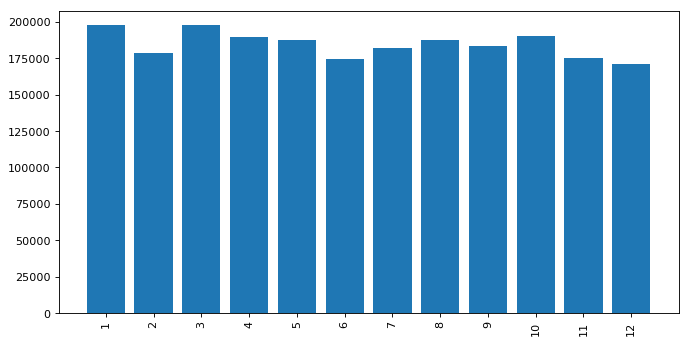

In [13]:
monthly_count = pd.DataFrame(incidents.groupby(['Month']).count()).reset_index() 
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
monthly_count = monthly_count.sort_values("DayOfWeek")
plt.bar(monthly_count["Month"], monthly_count["DayOfWeek"])
plt.xticks(monthly_count["Month"], rotation = 90, )
fig.show()

In [14]:
train, test = train_test_split(incidents, test_size = 0.2)

In [15]:
train_target = train.pop("Category")
test_target = test.pop("Category")

In [16]:
train_target_nodumm = train_target
test_target_nodumm = test_target
train_target = pd.get_dummies(train_target)
test_target = pd.get_dummies(test_target)

In [17]:
train = train.join(pd.get_dummies(train["DayOfWeek"]))
test = test.join(pd.get_dummies(test["DayOfWeek"]))
#train = train.join(pd.get_dummies(train["Resolution"]))
#test = test.join(pd.get_dummies(test["Resolution"]))
train = train.drop(["DayOfWeek"], axis = 1)
test = test.drop(["DayOfWeek"], axis = 1)


train['Time'] = [int(inc[:2])*60 + int(inc[3:]) for inc in train['Time']]

test['Time'] = [int(inc[:2])*60 + int(inc[3:]) for inc in test['Time']]

train = train.join(pd.get_dummies(train["PdDistrict"]))
test = test.join(pd.get_dummies(test["PdDistrict"]))
train = train.drop(["PdDistrict"], axis = 1)
test = test.drop(["PdDistrict"], axis = 1)

In [18]:
train.head(10)

,Time,X,Y,Day,Month,Friday,Monday,Saturday,Sunday,Thursday,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
379519,970,-122.433598,37.779354,23,10,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19701,1140,-122.417107,37.785324,15,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
581990,1350,-122.417019,37.789110,8,7,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
609255,640,-122.419938,37.768662,1,5,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1815423,1080,-122.474261,37.725746,19,9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96332,1290,-122.399689,37.797807,3,9,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
966536,510,-122.452015,37.774197,22,11,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
342959,1069,-122.393131,37.736250,23,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
107893,782,-122.416349,37.782557,7,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1784888,810,-122.439442,37.774313,5,12,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense, Reshape

Using TensorFlow backend.


In [20]:
import numpy as np
model_m = Sequential()
model_m.add(Dense(100, activation = "softmax", input_shape=(22,1)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(39, activation='softmax'))
print(model_m.summary())

model_m.compile(
 optimizer = "adam",
 loss = "categorical_crossentropy",
 metrics = ["categorical_accuracy"]
)
train_m = np.expand_dims(train, axis=2)
result_m = model_m.fit(train_m, train_target, epochs=20, batch_size=64, validation_split = 0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 22, 100)           200       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 13, 100)           100100    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 39)                3939      
Total params: 104,239
Trainable params: 104,239
Non-trainable params: 0
_______________

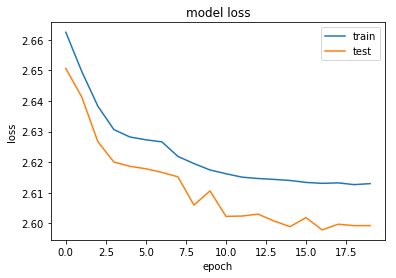

In [21]:
plt.plot(result_m.history["loss"])
plt.plot(result_m.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()